In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install prettytable
%pip install colorama
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from colorama import Fore, Style

# Scikit-learn libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix,silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans



# **Graded Notebook**

#### **Dataset Information**

We will use the **Advertising dataset**. This dataset contains information on advertising budgets for TV, radio, and newspapers, and their relationship with product sales.

You can download the dataset using the following steps:

1. Open your web browser and navigate to this link: [Advertising.csv](https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv)
2. Right-click on the page and select **Save As** (or the equivalent option in your browser).
3. Save the file as `Advertising.csv` in the same directory as this notebook.

## **Task 1: Predicting Sales from Advertising Data**

### **1. Data Exploration and Preparation (10 points)**

#### **1.1: Load, inspect and display the dataset (10 points)**
- Load the provided dataset (`Advertising.csv`).
- Display, print or plot any relevant information.
- What can you say about the data?


In [3]:
# load data from csv file
file_name = 'Advertising.csv'
df = pd.read_csv(file_name)

In [4]:
# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Data verification

In [5]:
# check for missing values
null_counts = df.isnull().sum()
print("\nNull values in each column:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

# check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Null values in each column:
Unnamed: 0: 0
TV: 0
Radio: 0
Newspaper: 0
Sales: 0

Number of duplicate rows: 0


### Observations:
- The dataset is composed of 200 rows and 4 columns.
- The columns are TV, Radio, Newspaper, and Sales.
- The features are TV, Radio, and Newspaper and the target is Sales.
- All the values are numerical and there are no missing values or duplicates.

This dataset seems to have information about the advertising budgets for TV, radio, and newspapers, and their relationship with product sales. 
The unit of the budget is not mentioned in the dataset, but it is assumed to be in thousands of dollars 
The unit of the sales is not mentioned in the dataset, but it is assumed to be in thousands of units 
> The unit where not mentioned in the dataset, but it is assumed to be in thousands of dollars for the budget and thousands of units for the sales after observing the values in the dataset and make a fast research on the internet.


### Preprocessing of the data

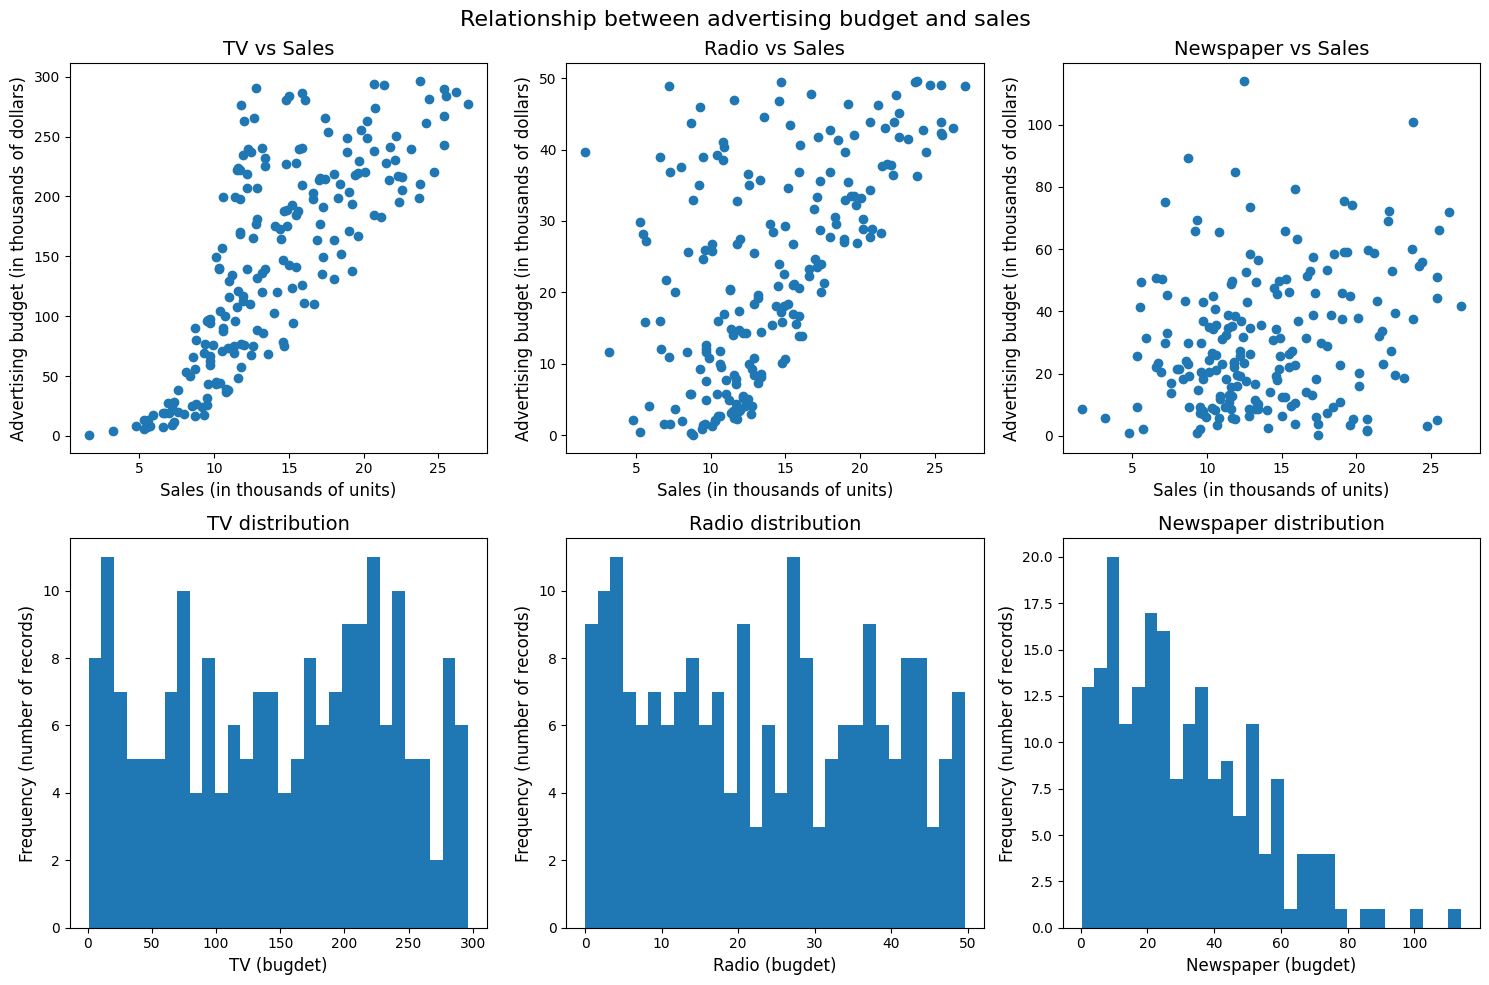

In [6]:
# prepare data for plotting
features = df[['TV', 'Radio', 'Newspaper']].values
target = df['Sales'].values

feature_names = df.columns[1:-1]
target_name = df.columns[-1]

# Update the plotting code with inverted axes for scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(len(feature_names)):
   
    # scatter plot to show the relationship between the feature and target
    axs[0,i].scatter(target, features[:, i])  
    axs[0,i].set_ylabel("Advertising budget (in thousands of dollars)", fontsize=12)
    axs[0,i].set_xlabel(target_name+ " (in thousands of units)", fontsize=12)
    axs[0,i].set_title(f'{feature_names[i]} vs {target_name}', fontsize=14)
    axs[0,i].tick_params(axis='both', which='major', labelsize=10)
    
    # histogram to show the distribution of the feature
    axs[1,i].hist(features[:, i], bins=30)
    axs[1,i].set_xlabel(feature_names[i] + " (bugdet)", fontsize=12)
    axs[1,i].set_ylabel('Frequency (number of records)', fontsize=12)
    axs[1,i].set_title(f'{feature_names[i]} distribution', fontsize=14)
    axs[1,i].tick_params(axis='both', which='major', labelsize=10)


# add a main title to the plot
plt.suptitle("Relationship between advertising budget and sales", fontsize=16)
# use tight_layout to improve spacing of subplots 
plt.tight_layout()

plt.show()

# TODO more explaination

---

### **2. Regression Analysis (40 points)**

#### **2.1: Train a Linear Regression Model (15 points)**
- Train a linear regression model for each feature and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


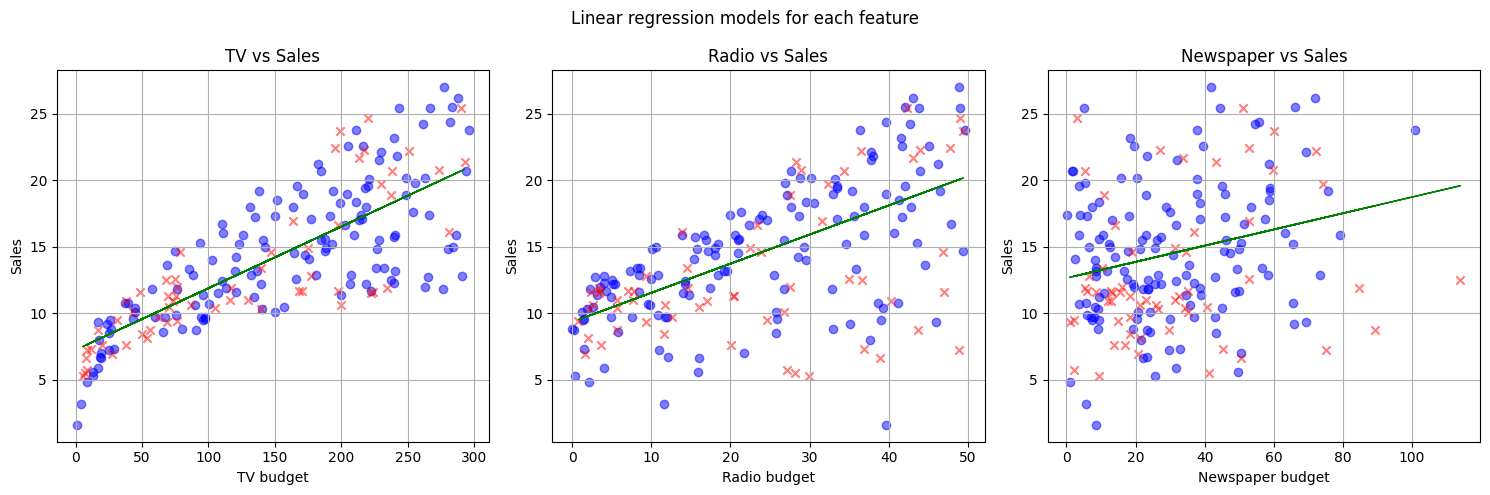

+-----------+--------------------+---------------------+-----------+
|  Feature  | Mean Squared Error | Mean Absolute Error | R^2 Score |
+-----------+--------------------+---------------------+-----------+
|     TV    |        8.97        |         2.28        |    0.67   |
|   Radio   |       23.72        |         3.70        |    0.13   |
| Newspaper |       28.87        |         4.56        |   -0.06   |
+-----------+--------------------+---------------------+-----------+
MSE lower is better, MAE lower is better, R^2 Score higher is better


In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# create a table to store the model performance
table = PrettyTable() 

table.field_names = ["Feature", "Mean Squared Error", "Mean Absolute Error", "R^2 Score"]

# Iterate over each feature
for i in range(len(feature_names)):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=0.3, random_state=42)

    # Reshape the data to a 2D array for the model fit
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    Y_train = y_train.reshape(-1, 1)
    Y_test = y_test.reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # plot the model 
    axs[i].scatter(X_train, Y_train, color='blue',alpha=0.5)
    axs[i].scatter(X_test, Y_test, color='red',marker='x',alpha=0.5)
   
    axs[i].plot(X_test, y_pred, color='green', linewidth=1)
    axs[i].set_title(f'{feature_names[i]} vs Sales')
    axs[i].set_xlabel(f'{feature_names[i]} budget')
    axs[i].set_ylabel('Sales')
    axs[i].grid(True)
    
    # Print the model's performance
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    table.add_row([feature_names[i], f"{mse:.2f}", f"{mae:.2f}", f"{r2:.2f}"])
    
    
plt.suptitle('Linear regression models for each feature')
plt.tight_layout()
plt.show()
    
print(table)
print("MSE lower is better, MAE lower is better, R^2 Score higher is better")




# TODO explain

#### **2.2: Polynomial Features (25 points)**
- Extend the regression model by adding polynomial features.
- Evaluate the models performances.
- Display, print or plot any relevant information.
- Discuss which model fits the data best and why.

C:\Users\david\AppData\Local\Temp\ipykernel_3764\2940396508.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance = pd.concat([performance, pd.DataFrame([{


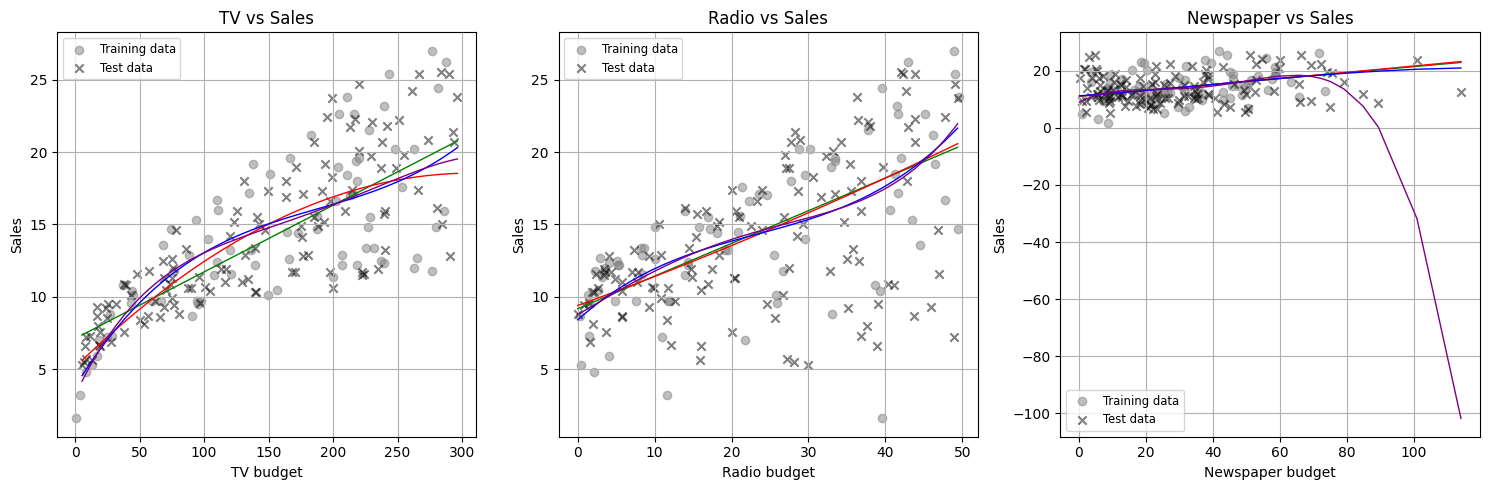

+-----------------------------------------------+
|               Model Performance               |
+-----------+--------+---------+-------+--------+
|  Feature  | Degree |   MSE   |  MAE  |   R2   |
+-----------+--------+---------+-------+--------+
|     TV    |   1    |  8.571  | 2.273 | 0.673  |
|     TV    |   2    |  9.136  | 2.391 | 0.651  |
|     TV    |   3    |  9.252  |  2.46 | 0.647  |
|     TV    |   4    |  9.266  | 2.479 | 0.646  |
|   Radio   |   1    |  20.046 | 3.406 | 0.235  |
|   Radio   |   2    |  20.014 | 3.404 | 0.236  |
|   Radio   |   3    |  20.136 | 3.452 | 0.231  |
|   Radio   |   4    |  20.135 | 3.437 | 0.231  |
| Newspaper |   1    |  28.269 | 4.318 | -0.079 |
| Newspaper |   2    |  28.323 | 4.318 | -0.081 |
| Newspaper |   3    |  27.713 | 4.295 | -0.058 |
| Newspaper |   4    | 161.714 | 5.631 | -5.174 |
+-----------+--------+---------+-------+--------+
MSE lower is better, MAE lower is better, R2 higher is better and if negative, model is worse than a

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for different degrees
colors = ['green', 'red', 'blue', 'purple']

# Create array of degrees
degrees = np.arange(1, 5)

# To use the colors in sequence matching degrees length:
color_sequence = [colors[i % len(colors)] for i in range(20)]


# create table to store the model performance metrics for each feature and for each degree
performance = pd.DataFrame(columns=['Feature', 'Degree', 'MSE', 'MAE', 'R2'])


# Iterate over each feature
for i in range(len(feature_names)):
    # Split data once per feature
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=0.6, random_state=42)
    
    # Plot data points
    axs[i].scatter(X_train, y_train, color='gray', alpha=0.5, label='Training data')
    axs[i].scatter(X_test, y_test, color='black', marker='x', alpha=0.5, label='Test data')
    
   # Reshape data
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Sort X_test for smooth line plotting only
    X_test_sorted = np.sort(X_test, axis=0)

    for deg, color in zip(degrees, color_sequence):
        # Create polynomial features
        poly = PolynomialFeatures(degree=deg)
        X_train_poly = poly.fit_transform(X_train)
        
        # Create two versions of test data - sorted (for plotting) and unsorted (for metrics)
        X_test_poly = poly.transform(X_test)  # unsorted - for metrics
        X_test_sorted_poly = poly.transform(X_test_sorted)  # sorted - for plotting
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Plot using sorted data
        y_pred_plot = model.predict(X_test_sorted_poly)
        axs[i].plot(X_test_sorted, y_pred_plot, color=color, linewidth=1)
        
        # Calculate metrics using unsorted data
        y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Append to the performance table
        performance = pd.concat([performance, pd.DataFrame([{
            'Feature': feature_names[i], 
            'Degree': deg, 
            'MSE': mse, 
            'MAE': mae, 
            'R2': r2
        }])], ignore_index=True)
    
    axs[i].set_title(f'{feature_names[i]} vs Sales')
    axs[i].set_xlabel(f'{feature_names[i]} budget')
    axs[i].set_ylabel('Sales')
    axs[i].grid(True)
    axs[i].legend(fontsize='small')

plt.tight_layout()
plt.show()

# Display the performance metrics for each feature and degree

# Round numeric columns to 3 decimal places
performance = performance.round(3)

table = PrettyTable()
table.title = 'Model Performance'
table.field_names = performance.columns

for row in performance.itertuples(index=False):
    table.add_row(row)

print(table)
print("MSE lower is better, MAE lower is better, R2 higher is better and if negative, model is worse than a horizontal line")


### Observations:
TODO

---

## **Task 2: Predicting High Sales with Classification**

In this task, you will create a binary classification model to predict whether sales are above a certain threshold based on the advertising data. This will help you understand how classification models can be applied to predict categories based on features.

### **1. Dataset Generation (10 points)**

#### **1.1: Transform the advertising dataset for classification (5 points)**

- Convert the target variable into a binary classification problem using the threshold of your choice.
- Display, print or plot any relevant information.
- Explain your threshold choice.

High_Sales
0    111
1     89
Name: count, dtype: int64
Threshold (Average Sales): 14.02
High_Sales
0    111
1     89
Name: count, dtype: int64


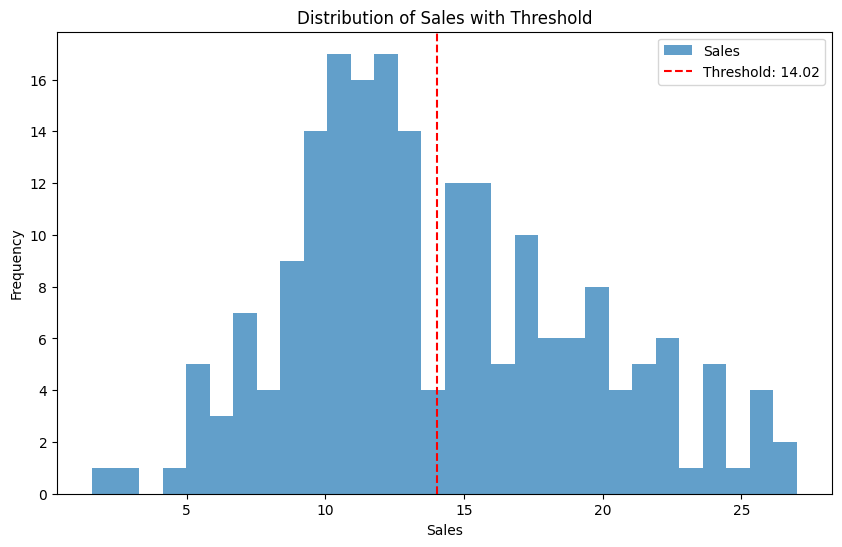

In [10]:
# Calculate the threshold
threshold = df['Sales'].mean()

# Convert the target variable into binary classes
df['High_Sales'] = (df['Sales'] > threshold).astype(int)
print(df['High_Sales'].value_counts())
print("=====================================")
# Display relevant information
print(f"Threshold (Average Sales): {threshold:.2f}")
print(df['High_Sales'].value_counts())

# Plot the distribution of sales and the threshold
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=30, alpha=0.7, label='Sales')
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales with Threshold')
plt.legend()
plt.show()


# TODO explain

#### **1.2: Exploratory data analysis (5 points)**

- Display, print or plot any relevant information.
- How is each feature doing on this new classification task?

In [11]:
# TODO : do some visualization to show the relationship between the features and the high sales that is a binary variable

---

### **2. Classification (40 points)**

#### **2.1: Model Training and Evaluation (20 points)**

- Train several classification models and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


C:\Users\david\AppData\Local\Temp\ipykernel_26660\1425204600.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  classification_results = pd.concat([classification_results,


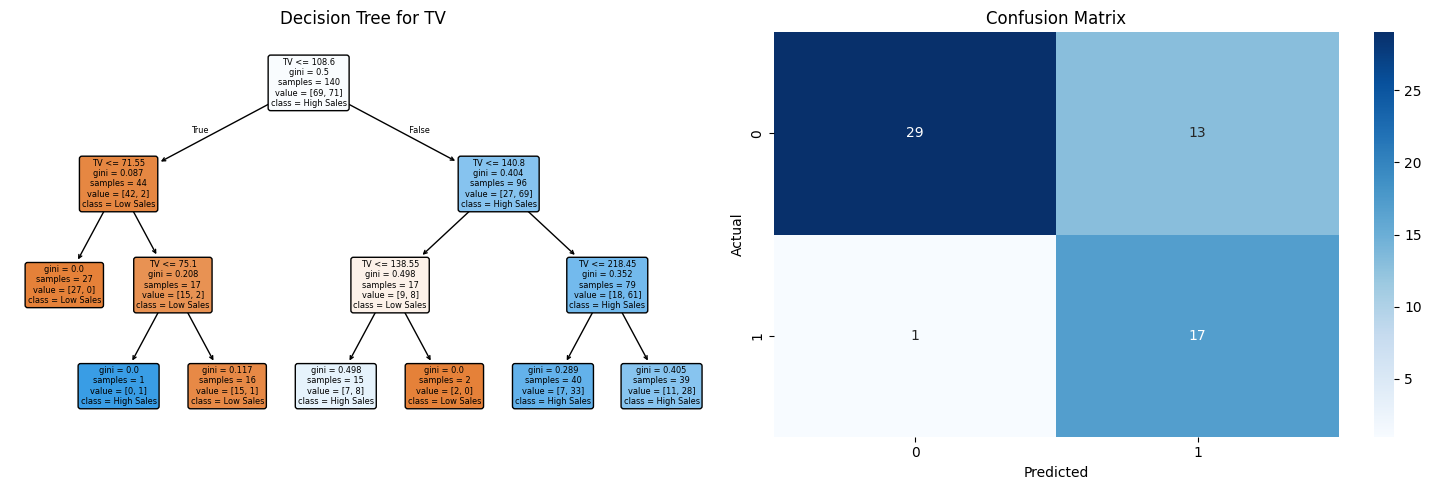

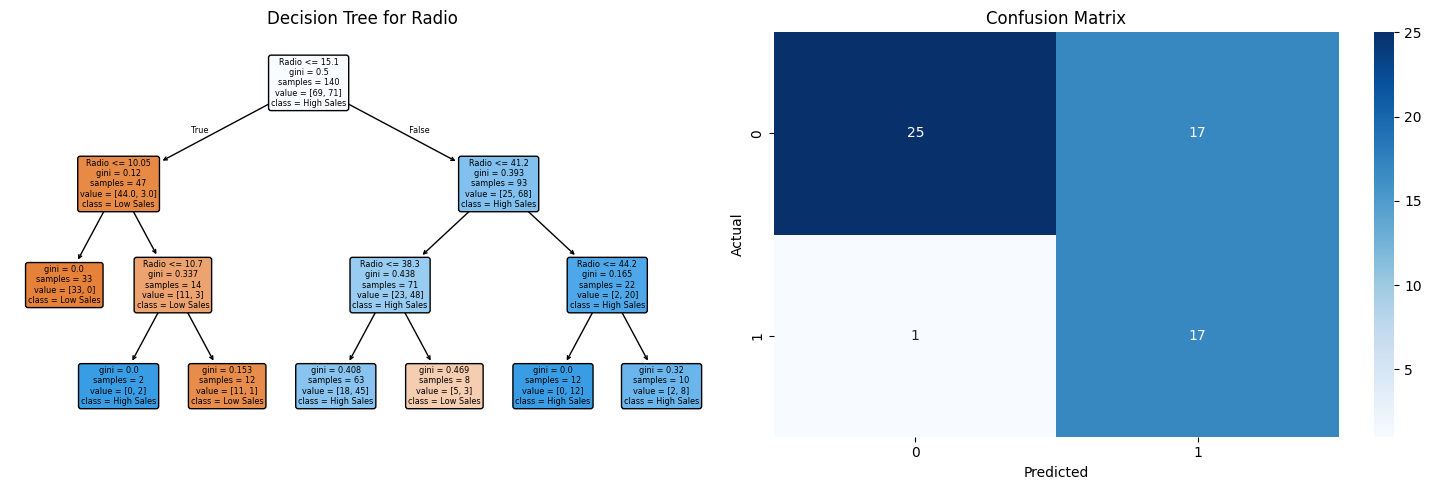

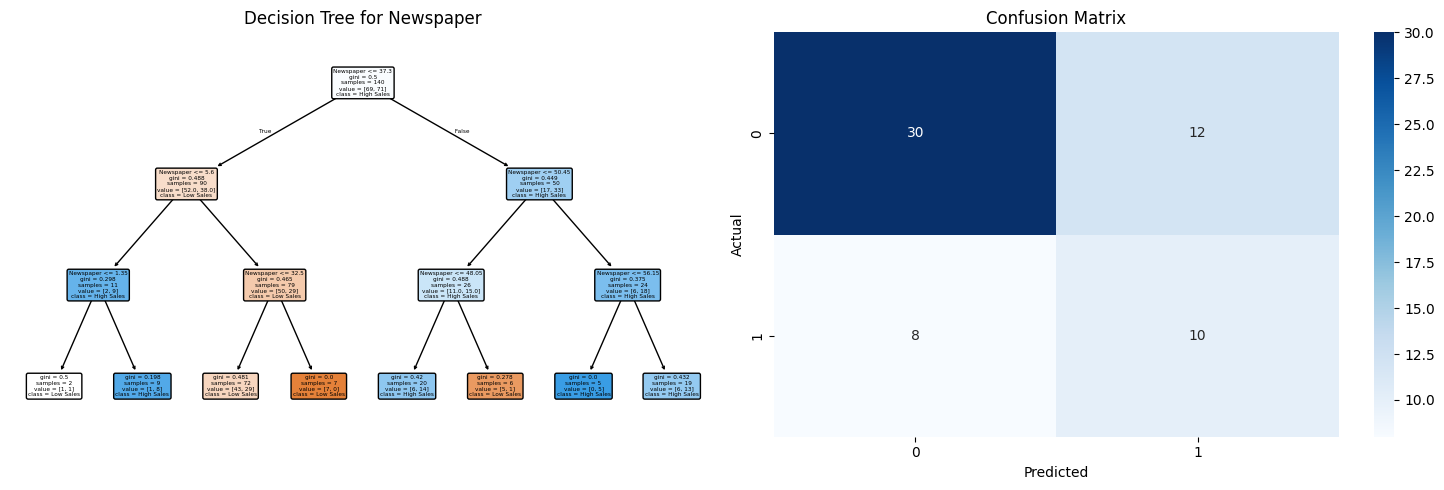

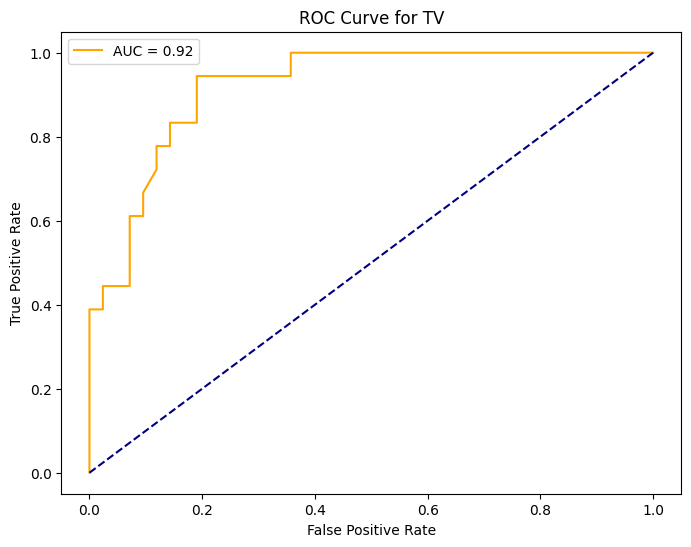

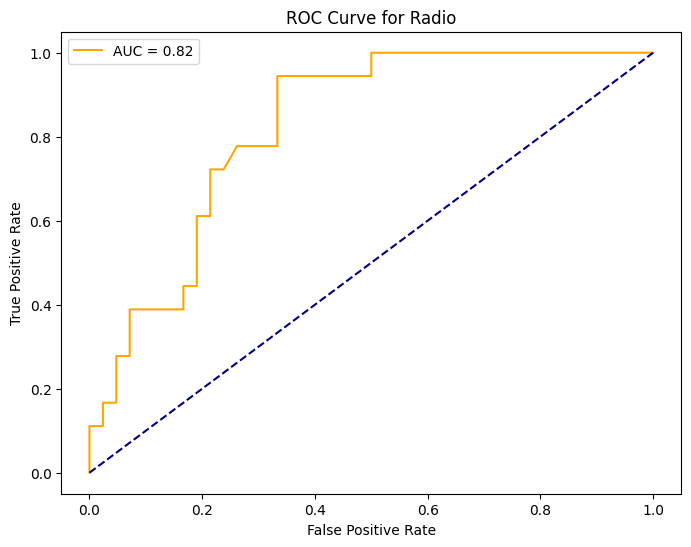

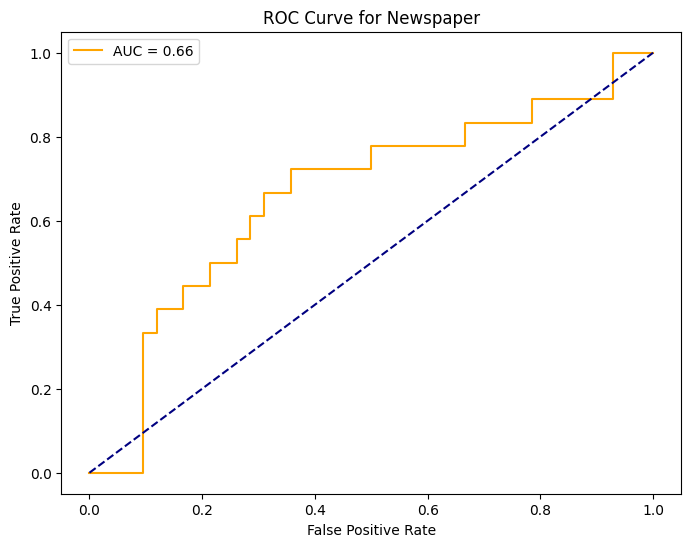

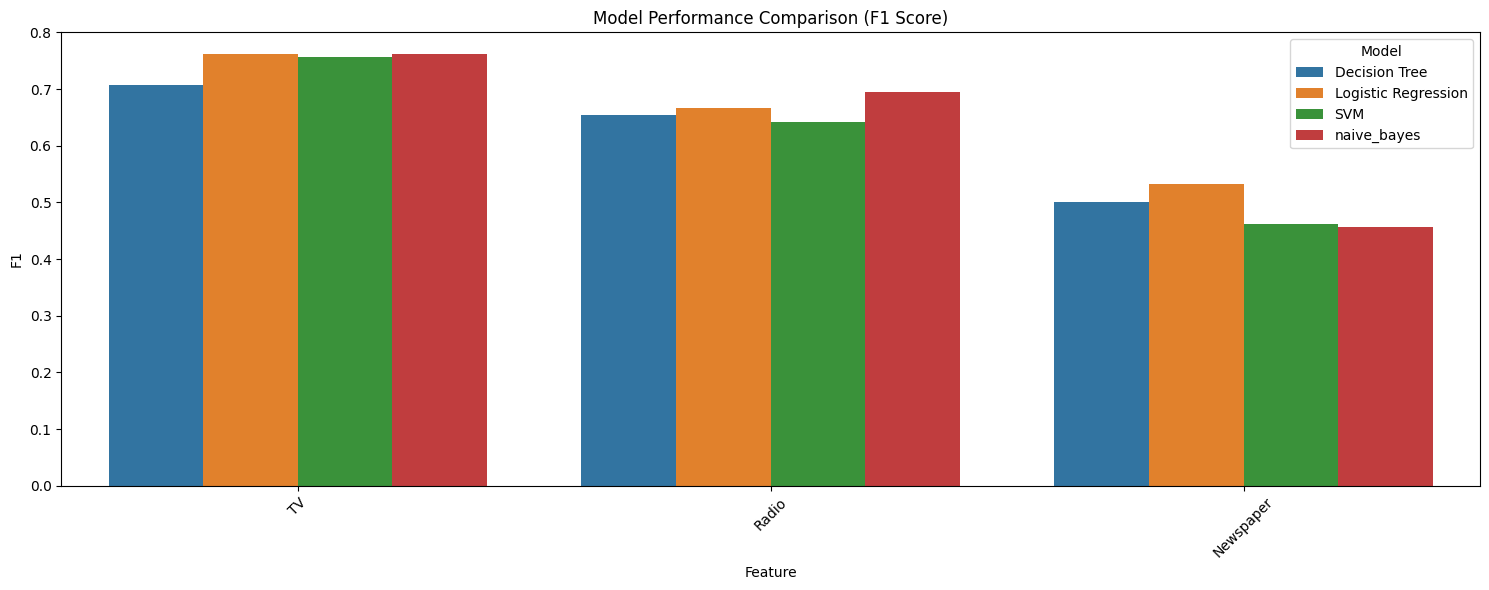


Classification Results (sorted by F1 score):
+-----------+---------------------+----------+------------------------+----------------------+-------+----------+
|  Feature  |        Model        | Accuracy | Precision (senstivity) | Recall (specificity) |   F1  | CV_Score |
+-----------+---------------------+----------+------------------------+----------------------+-------+----------+
| Newspaper | Logistic Regression |   0.65   |         0.444          |        0.667         | 0.533 |  0.605   |
| Newspaper |    Decision Tree    |  0.667   |         0.455          |        0.556         |  0.5  |  0.575   |
| Newspaper |         SVM         |   0.65   |         0.429          |         0.5          | 0.462 |   0.61   |
| Newspaper |     naive_bayes     |  0.683   |         0.471          |        0.444         | 0.457 |  0.605   |
|   Radio   |     naive_bayes     |   0.75   |         0.548          |        0.944         | 0.694 |  0.715   |
|   Radio   | Logistic Regression |  0.733

In [33]:
## todo : add other classification models to compare the performance

# Create a table to store the classification results
# Define classifiers
from sklearn.naive_bayes import GaussianNB

classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'naive_bayes': GaussianNB(),
}

# Create results DataFrame with model column
classification_results = pd.DataFrame(columns=['Feature', 'Model', 'Accuracy', 'Precision (senstivity)', 'Recall (specificity)', 'F1', 'CV_Score'])

# Iterate over models and features
for name, model in classifiers.items():
    for i in range(len(feature_names)):
        X = features[:, i].reshape(-1, 1)
        y = df['High_Sales']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = round(accuracy_score(y_test, y_pred), 3)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        metrics = classification_report(y_test, y_pred, output_dict=True)['1']
        
        # Add results
        new_row = {
            'Feature': feature_names[i],
            'Model': name,
            'Accuracy': accuracy,
            'Precision (senstivity)': round(metrics['precision'], 3),
            'Recall (specificity)': round(metrics['recall'], 3),
            'F1': round(metrics['f1-score'], 3),
            'CV_Score': round(cv_scores.mean(), 3),
        }
        classification_results = pd.concat([classification_results, 
                                         pd.DataFrame([new_row])], 
                                         ignore_index=True)
        
        # Plot confusion matrix for each model
        if name == 'Decision Tree':
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
            
            # Decision Tree
            plot_tree(model, feature_names=[feature_names[i]], 
                      class_names=['Low Sales', 'High Sales'],
                      filled=True, rounded=True, ax=ax1)
            ax1.set_title(f'Decision Tree for {feature_names[i]}')
            
            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2, annot_kws={"size": 10})
            ax2.set_title('Confusion Matrix')
            ax2.set_xlabel('Predicted')
            ax2.set_ylabel('Actual')
            
            plt.tight_layout()
            plt.show()
            
        # Plot ROC curve for each model
        if name == 'Logistic Regression':
            from sklearn.metrics import roc_curve, roc_auc_score

            # Get probabilities
            y_probs = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            auc = roc_auc_score(y_test, y_probs)
            
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.2f}')
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {feature_names[i]}')
            plt.legend()
            plt.show()

# Create comparative visualizations
plt.figure(figsize=(15, 6))
sns.barplot(data=classification_results, x='Feature', y='F1', hue='Model')
plt.title('Model Performance Comparison (F1 Score)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display results table
print("\nClassification Results (sorted by F1 score):")
results_sorted = classification_results.sort_values(['Feature', 'F1'], ascending=[True, False])
table = PrettyTable()
table.field_names = results_sorted.columns
for row in results_sorted.itertuples(index=False):
    table.add_row(row)
print(table)
print("\nNote: Higher values are better for all metrics. CV_Score is the mean of 5-fold cross-validation.")


# TODO explain

#### **2.2: PCA (20 points)**

- Apply PCA and train the classification model of your choice.
- Display, print or plot any relevant information.
- Discuss how PCA affects model performance and interpret the results.

C:\Users\david\AppData\Local\Temp\ipykernel_26660\3412159774.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pca_results = pd.concat([pca_results,


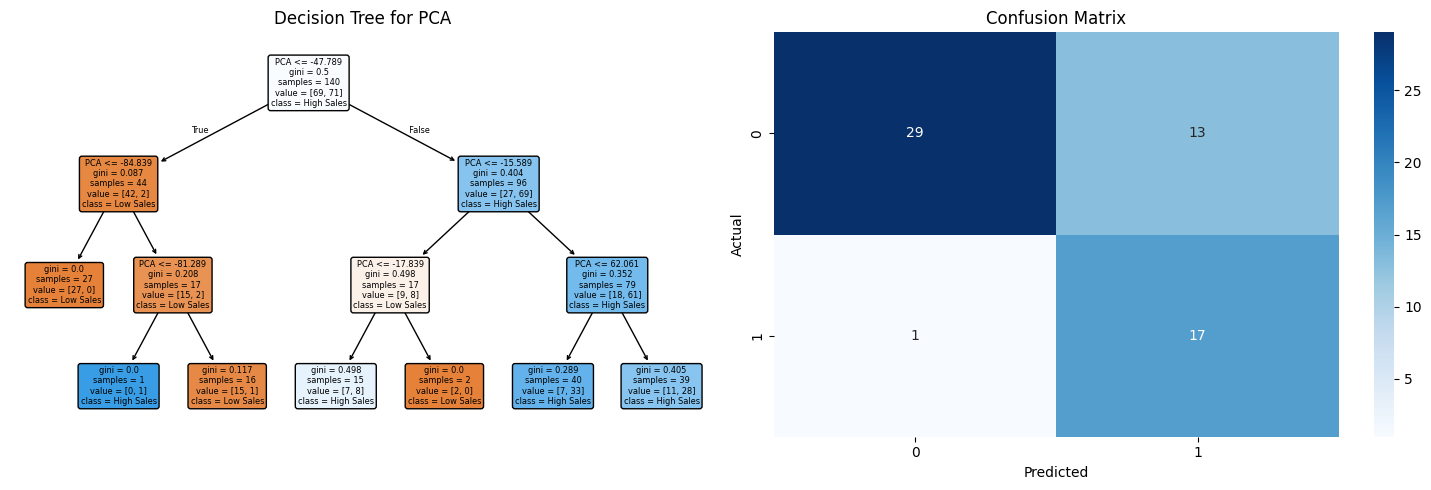

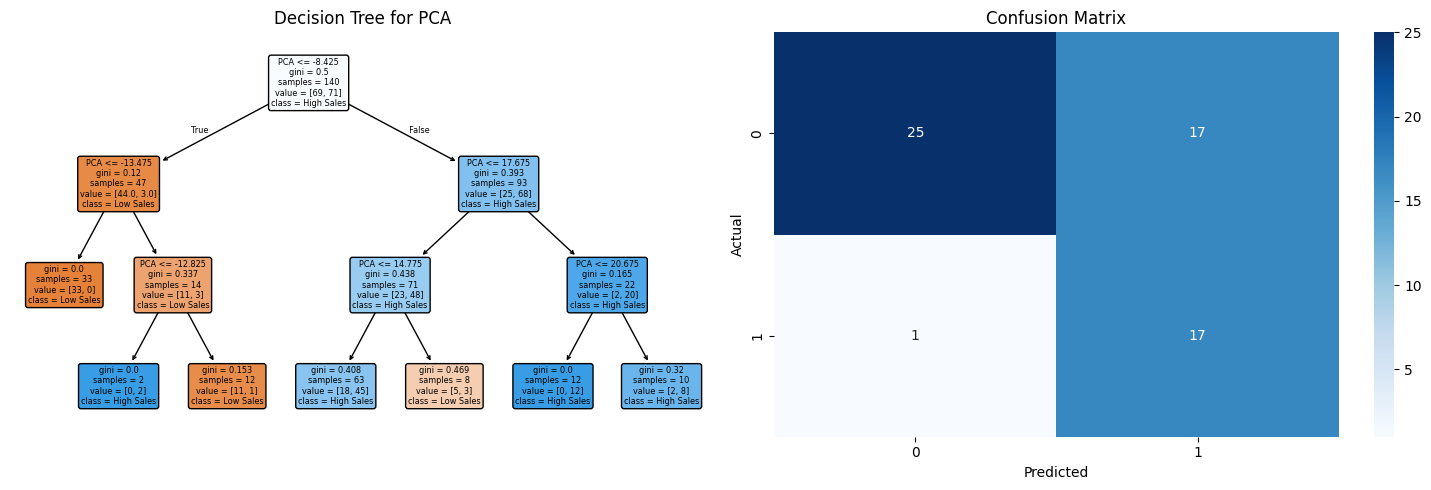

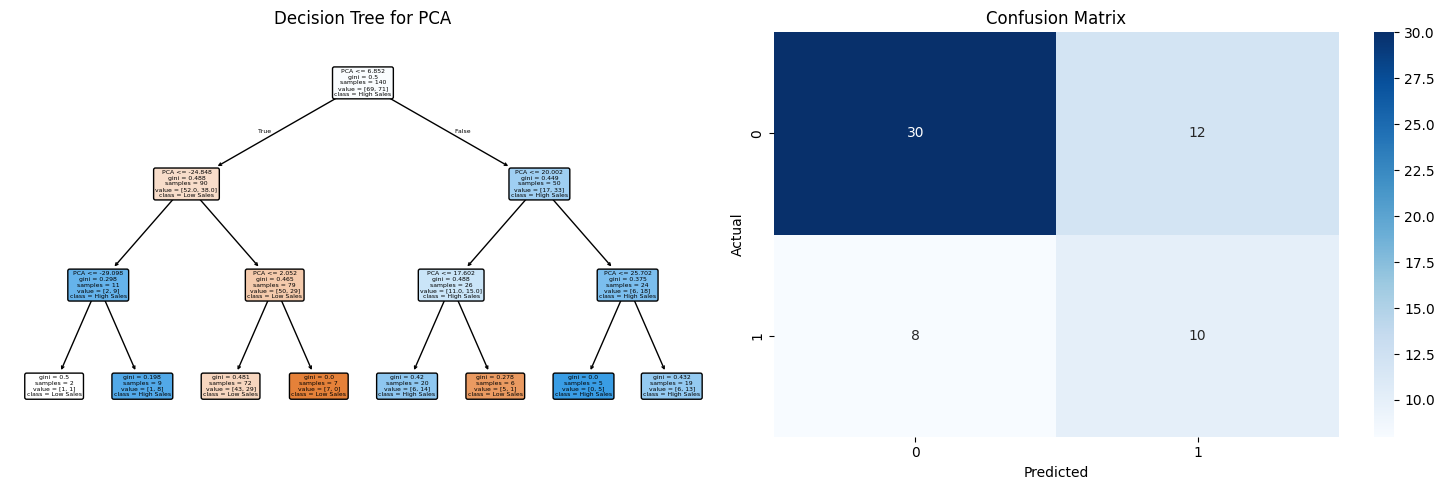


Note: Higher values are better for all metrics. CV_Score is the mean of 5-fold cross-validation.


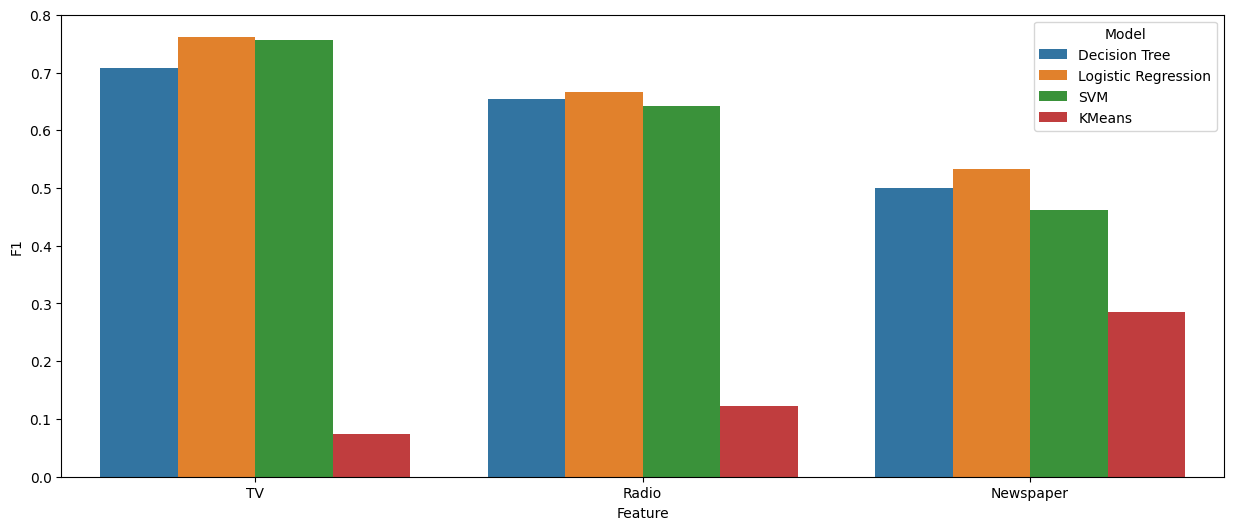

In [17]:
# TODO : do The PCA analysis to reduce the dimensionality of the data and then apply the classification models to compare the performance

# Aply PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA

# Create a table to store the PCA results
pca_results = pd.DataFrame(columns=['Feature', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'CV_Score'])

# Iterate over features and models
for i in range(len(feature_names)):
    X = features[:, i].reshape(-1, 1)
    y = df['High_Sales']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Apply PCA
    pca = PCA(n_components=1)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    for name, model in classifiers.items():
        # Train and predict
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)
        
        # Calculate metrics
        accuracy = round(accuracy_score(y_test, y_pred), 3)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        metrics = classification_report(y_test, y_pred, output_dict=True)['1']
        
        # Add results
        new_row = {
            'Feature': feature_names[i],
            'Model': name,
            'Accuracy': accuracy,
            'Precision': round(metrics['precision'], 3),
            'Recall': round(metrics['recall'], 3),
            'F1': round(metrics['f1-score'], 3),
            'CV_Score': round(cv_scores.mean(), 3)
        }
        pca_results = pd.concat([pca_results, 
                                 pd.DataFrame([new_row])], 
                                 ignore_index=True)
        
        # Plot confusion matrix for each model
        if name == 'Decision Tree':
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
            
            # Decision Tree
            plot_tree(model, feature_names=['PCA'], 
                      class_names=['Low Sales', 'High Sales'],
                      filled=True, rounded=True, ax=ax1)
            ax1.set_title(f'Decision Tree for PCA')
            
            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2, annot_kws={"size": 10})
            ax2.set_title('Confusion Matrix')
            ax2.set_xlabel('Predicted')
            ax2.set_ylabel('Actual')
            
            plt.tight_layout()
            plt.show()
        
    
# Create comparative visualizations beetwen PCA and the original features
plt.figure(figsize=(15, 6))
sns.barplot(data=pca_results, x='Feature', y='F1', hue='Model')
print("\nNote: Higher values are better for all metrics. CV_Score is the mean of 5-fold cross-validation.")



# TODO explain

---

## **Task 3 (Bonus): Unsupervised Learning**

In this task, you will use unsupervised learning techniques to explore and segment the data based on advertising budgets.

### **1. Clustering (10 points)**

#### **1.1: K-Means (10 points)**

- Apply K-Means clustering to segment the data. Feel free to use any feature or combinaison.
- Display, print or plot any relevant information.
- Discuss the characteristics of each cluster.

C:\Users\david\AppData\Local\Temp\ipykernel_24132\169349827.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)


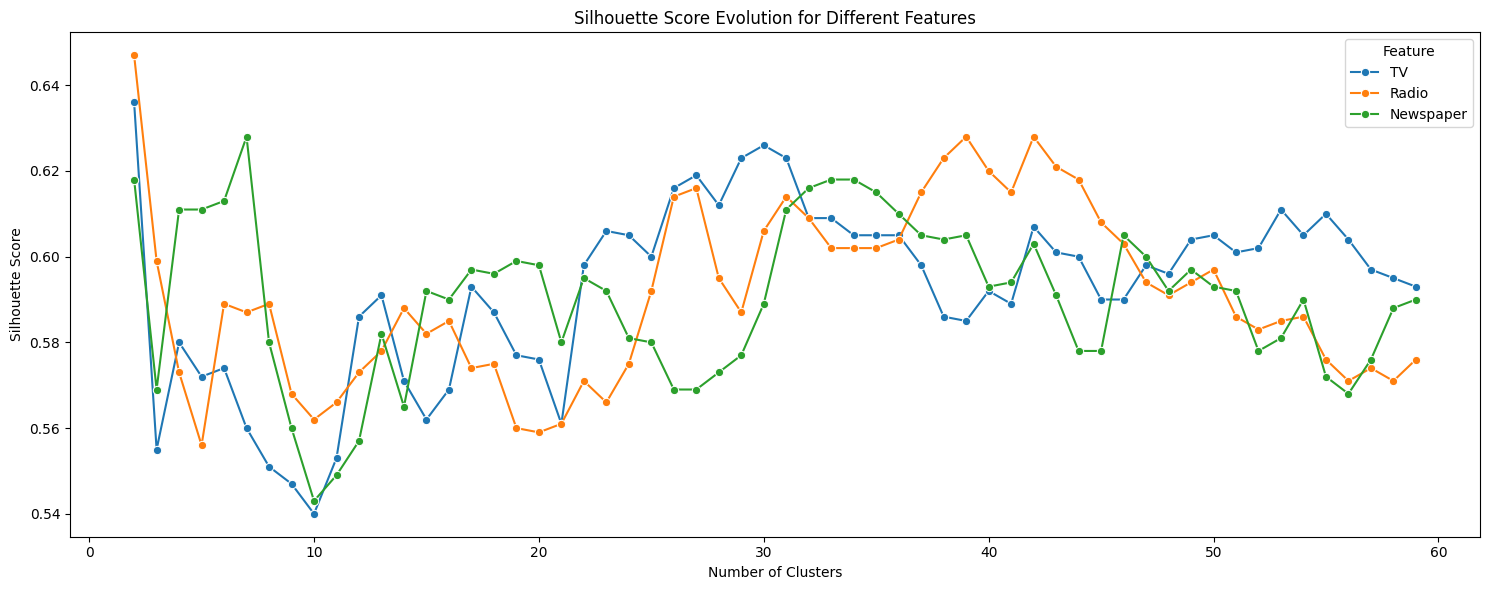

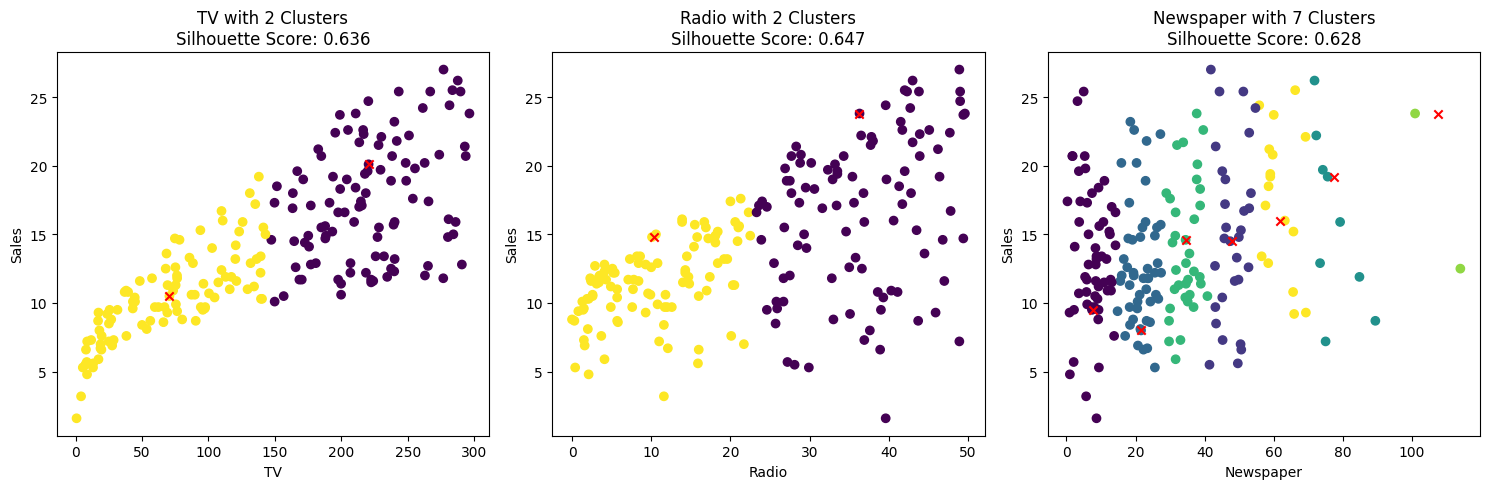

+-----------+--------------------+------------------+
|  Feature  | Number of Clusters | Silhouette Score |
+-----------+--------------------+------------------+
|     TV    |         2          |      0.636       |
|     TV    |         3          |      0.555       |
|     TV    |         4          |       0.58       |
|     TV    |         5          |      0.572       |
|     TV    |         6          |      0.574       |
|     TV    |         7          |       0.56       |
|     TV    |         8          |      0.551       |
|     TV    |         9          |      0.547       |
|     TV    |         10         |       0.54       |
|     TV    |         11         |      0.553       |
|     TV    |         12         |      0.586       |
|     TV    |         13         |      0.591       |
|     TV    |         14         |      0.571       |
|     TV    |         15         |      0.562       |
|     TV    |         16         |      0.569       |
|     TV    |         17    

In [80]:
number_of_clusters = np.arange(2, 60)

# Create a table to store the clustering results
clustering_results = pd.DataFrame(columns=['Feature', 'Number of Clusters', 'Silhouette Score'])

# Iterate over features and models
for i in range(len(feature_names)):
    X_train, X_test, y_train, y_test = train_test_split(features[:, i].reshape(-1, 1), target, test_size=0.3, random_state=42)
    
    # for each number of clusters
    for n_clusters in number_of_clusters:
        # Create KMeans model
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        y_pred = kmeans.fit_predict(X_train)
        
        # Calculate silhouette score
        silhouette = round(silhouette_score(X_train, y_pred), 3)
        
        # Add results
        new_row = {
            'Feature': feature_names[i],
            'Number of Clusters': n_clusters,
            'Silhouette Score': silhouette
        }
        
        clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)

# Plot the silhouette score evolution for each feature
plt.figure(figsize=(15, 6))
sns.lineplot(data=clustering_results, x='Number of Clusters', y='Silhouette Score', hue='Feature', marker='o')
plt.title('Silhouette Score Evolution for Different Features')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Find the best number of clusters for each feature
best_clusters = clustering_results.loc[clustering_results.groupby('Feature')['Silhouette Score'].idxmax()]

# Visualize the clusters for the best number of clusters for each feature horizontally
num_features = len(feature_names)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i, ax in enumerate(axes):
    feature = feature_names[i]
    best_n_clusters = best_clusters[best_clusters['Feature'] == feature]['Number of Clusters'].values[0]
    best_silhouette = best_clusters[best_clusters['Feature'] == feature]['Silhouette Score'].values[0]
    
    # Create KMeans model with the best number of clusters
    kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
    y_pred = kmeans.fit_predict(features[:, i].reshape(-1, 1))
    
    # Plot the clusters
    ax.scatter(features[:, i], target, c=y_pred, cmap='viridis')
    for center in kmeans.cluster_centers_:
        ax.scatter(center, target[np.argmin(np.abs(features[:, i] - center))], c='red', marker='x')
    ax.set_title(f'{feature} with {best_n_clusters} Clusters\nSilhouette Score: {best_silhouette}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

# Display results table
table = PrettyTable()
table.field_names = clustering_results.columns
for row in clustering_results.itertuples(index=False):
    table.add_row(row)
print(table)
print("\nNote: Higher silhouette score indicates better clustering")



# Observations: TODO

We have observed that the k-means algorithm has acheive to create quite good clusters.
For exmaple for the TV feature, the algorithm has best performed with 2 clusters, and the clusters are well separated. (pratically separated the bugdet of advertising in two groups)